In [1]:
import pandas as pd 
import numpy as np
import re


In [2]:
import nltk

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 


In [3]:
data = pd.read_csv(r'C:\Users\Vivek\OneDrive\Desktop\cleaned_tweets.csv')

In [4]:
data.head()

,Unnamed: 0,Tweets,cleaned_tweets,Tweet Date
0,0,bawazeer2 china4tech it will take a lot of hum...,"['ErikSolheim', 'It', 'take', 'lot', 'humility...",3/6/2023 12:41
1,1,now for upsc prelims google and just understa...,"['AI', 'related', 'Important', 'terms', 'must'...",3/6/2023 12:41
2,2,zenship in a country called latvia he will be...,"['INEC', 'chairman', 'obtained', 'new', 'citiz...",3/6/2023 12:41
3,3,e meeting that google exec was set to attend ...,"['Technical', 'difficulties', 'delay', 'commit...",3/6/2023 12:41
4,4,people probably dont care at all about convers...,"['ca', ""n't"", 'shake', 'feeling', 'young', 'pe...",3/6/2023 12:41


In [6]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

data['cleaned']=data['cleaned_tweets'].map(lambda s:preprocess(s)) 
data.head()

,Unnamed: 0,Tweets,cleaned_tweets,Tweet Date,cleaned
0,0,bawazeer2 china4tech it will take a lot of hum...,"['ErikSolheim', 'It', 'take', 'lot', 'humility...",3/6/2023 12:41,eriksolheim take lot humility side america
1,1,now for upsc prelims google and just understa...,"['AI', 'related', 'Important', 'terms', 'must'...",3/6/2023 12:41,related important terms must know upsc prelims...
2,2,zenship in a country called latvia he will be...,"['INEC', 'chairman', 'obtained', 'new', 'citiz...",3/6/2023 12:41,inec chairman obtained new citizenship country...
3,3,e meeting that google exec was set to attend ...,"['Technical', 'difficulties', 'delay', 'commit...",3/6/2023 12:41,technical difficulties delay committee meeting...
4,4,people probably dont care at all about convers...,"['ca', ""n't"", 'shake', 'feeling', 'young', 'pe...",3/6/2023 12:41,shake feeling young people probably care conve...


In [8]:
data['cleaned'][0]

'eriksolheim take lot humility side america'

In [9]:
from textblob import TextBlob 
def get_tweet_sentiment(tweet): 

        analysis = TextBlob(tweet)
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
        


In [10]:
b=[]

for i in data['cleaned']:
    b.append(get_tweet_sentiment(i))

In [11]:
data['Sentiments']=b

In [12]:
data[data['Sentiments']=='negative']['Sentiments']=-1
data[data['Sentiments']=='neutral']['Sentiments']=0
data[data['Sentiments']=='positive']['Sentiments']=1

C:\Users\Vivek\AppData\Local\Temp/ipykernel_37464/2173683792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data['Sentiments']=='negative']['Sentiments']=-1
C:\Users\Vivek\AppData\Local\Temp/ipykernel_37464/2173683792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data['Sentiments']=='neutral']['Sentiments']=0
C:\Users\Vivek\AppData\Local\Temp/ipykernel_37464/2173683792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [18]:
#tweets_tdidf_1

In [1]:
range(3)

range(0, 3)

In [13]:
data.head()

,Unnamed: 0,Tweets,cleaned_tweets,Tweet Date,cleaned,Sentiments
0,0,bawazeer2 china4tech it will take a lot of hum...,"['ErikSolheim', 'It', 'take', 'lot', 'humility...",3/6/2023 12:41,eriksolheim take lot humility side america,neutral
1,1,now for upsc prelims google and just understa...,"['AI', 'related', 'Important', 'terms', 'must'...",3/6/2023 12:41,related important terms must know upsc prelims...,positive
2,2,zenship in a country called latvia he will be...,"['INEC', 'chairman', 'obtained', 'new', 'citiz...",3/6/2023 12:41,inec chairman obtained new citizenship country...,positive
3,3,e meeting that google exec was set to attend ...,"['Technical', 'difficulties', 'delay', 'commit...",3/6/2023 12:41,technical difficulties delay committee meeting...,neutral
4,4,people probably dont care at all about convers...,"['ca', ""n't"", 'shake', 'feeling', 'young', 'pe...",3/6/2023 12:41,shake feeling young people probably care conve...,positive


In [16]:
data.iloc[:, 3:].to_csv(r'C:\Users\Vivek\OneDrive\Desktop\tweets_sentiments.csv')

In [15]:
data.iloc[:, 3:]

,Tweet Date,cleaned,Sentiments
0,3/6/2023 12:41,eriksolheim take lot humility side america,neutral
1,3/6/2023 12:41,related important terms must know upsc prelims...,positive
2,3/6/2023 12:41,inec chairman obtained new citizenship country...,positive
3,3/6/2023 12:41,technical difficulties delay committee meeting...,neutral
4,3/6/2023 12:41,shake feeling young people probably care conve...,positive
...,...,...,...
10537,3/20/2023 12:25,seeing outflows nothing remotely qualifies exo...,neutral
10538,3/20/2023 12:25,feds pivot hyperinflation kills middle class c...,neutral
10539,3/20/2023 12:25,two billion people join world already experien...,positive
10540,3/20/2023 12:25,talking banking crisis causing recession baby ...,negative


In [20]:
df = pd.read_csv(r"C:\Users\Vivek\OneDrive\Desktop\tweets_sentiments.csv", encoding="utf-8")

In [41]:
import matplotlib.pyplot as plt
import numpy as np


<BarContainer object of 3 artists>

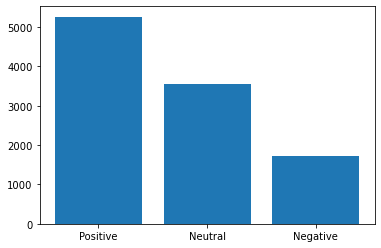

In [39]:
plt.bar(["Positive", "Neutral", "Negative"], df["Sentiments"].value_counts())

In [40]:
df["Sentiments"].value_counts()

positive    5264
neutral     3543
negative    1735
Name: Sentiments, dtype: int64